In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
T_ref=291.65 # [Kelvin]
sigma=5.670374419e-8
R_ref=1.1 # [Ohm]
V=np.array([1,2,3,4,5,6,7,8,9,10,11,12]) # [V]
I=np.array([0.53,0.67,0.80,0.91,1.02,1.15,1.25,1.34,1.42,1.49,1.57,1.65]) # [Ampere]
R=V/I
T=np.array([464.833151,673.275335,809.440559,921.887546,1008.579257,1061.682039,1126.586631,1190.077059,1251.244325,1312.960231,1361.713955,1405.637544]) # [Kelvin]
R_up_Ref=R/R_ref
T4=T**4
Rad=sigma*T4

    V [V]  I [A]     R [Ω]        T [K]     T^4 [K^4]     Rad [W/m²]
0       1   0.53  1.886792   464.833151  4.668618e+10    2647.281415
1       2   0.67  2.985075   673.275335  2.054806e+11   11651.519203
2       3   0.80  3.750000   809.440559  4.292792e+11   24341.738053
3       4   0.91  4.395604   921.887546  7.222903e+11   40956.565305
4       5   1.02  4.901961  1008.579257  1.034761e+12   58674.833315
5       6   1.15  5.217391  1061.682039  1.270509e+12   72042.639744
6       7   1.25  5.600000  1126.586631  1.610862e+12   91341.914398
7       8   1.34  5.970149  1190.077059  2.005859e+12  113739.697876
8       9   1.42  6.338028  1251.244325  2.451142e+12  138988.932595
9      10   1.49  6.711409  1312.960231  2.971709e+12  168507.029747
10     11   1.57  7.006369  1361.713955  3.438298e+12  194964.387350
11     12   1.65  7.272727  1405.637544  3.903852e+12  221363.050254


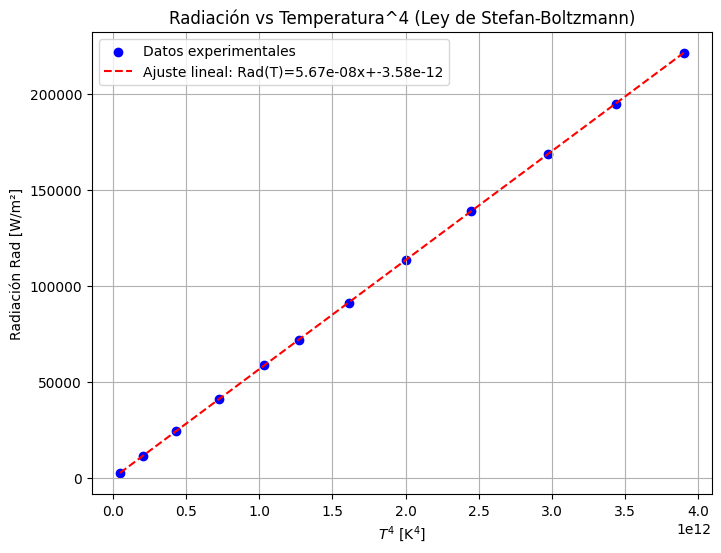

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes y datos de referencia
T_ref = 291.65  # [K]
sigma = 5.670374419e-8  # [W/m^2 K^4]
R_ref = 1.1  # [Ohm]

# Datos experimentales
V = np.array([1,2,3,4,5,6,7,8,9,10,11,12])  # [V]
I = np.array([0.53,0.67,0.80,0.91,1.02,1.15,1.25,1.34,1.42,1.49,1.57,1.65])  # [A]
T = np.array([464.833151,673.275335,809.440559,921.887546,1008.579257,
              1061.682039,1126.586631,1190.077059,1251.244325,
              1312.960231,1361.713955,1405.637544])  # [K]

# 1. Resistencia del filamento
R = V / I

# 2. Cociente respecto a R_ref
R_up_Ref = R / R_ref

# 3. Cuarta potencia de la temperatura
T4 = T**4

# 4. Radiación con ley de Stefan-Boltzmann
Rad = sigma * T4

# --- Mostrar tabla de resultados ---
import pandas as pd
tabla = pd.DataFrame({
    "V [V]": V,
    "I [A]": I,
    "R [Ω]": R,
    "T [K]": T,
    "T^4 [K^4]": T4,
    "Rad [W/m²]": Rad
})
print(tabla)

# --- Graficar Radiación vs T^4 ---
plt.figure(figsize=(8,6))
plt.scatter(T4, Rad, color="blue", label="Datos experimentales")
# Ajuste lineal
coef = np.polyfit(T4, Rad, 1)
fit = np.poly1d(coef)
plt.plot(T4, fit(T4), 'r--', label=f"Ajuste lineal: Rad(T)={coef[0]:.2e}x+{coef[1]:.2e}")
plt.xlabel(r"$T^4$ [K$^4$]")
plt.ylabel("Radiación Rad [W/m²]")
plt.title("Radiación vs Temperatura^4 (Ley de Stefan-Boltzmann)")
plt.legend()
plt.grid(True)
plt.show()


=== RESULTADOS DEL EXPERIMENTO ===
Pendiente experimental: 5.67037e-08 W/m²K⁴
Constante de Stefan-Boltzmann σ: 5.67037e-08 W/m²K⁴
Diferencia relativa: 0.000 %
Intercepto: -3.58e-12 W/m² (≈ radiación ambiental)
Coeficiente de correlación R²: 1.000000


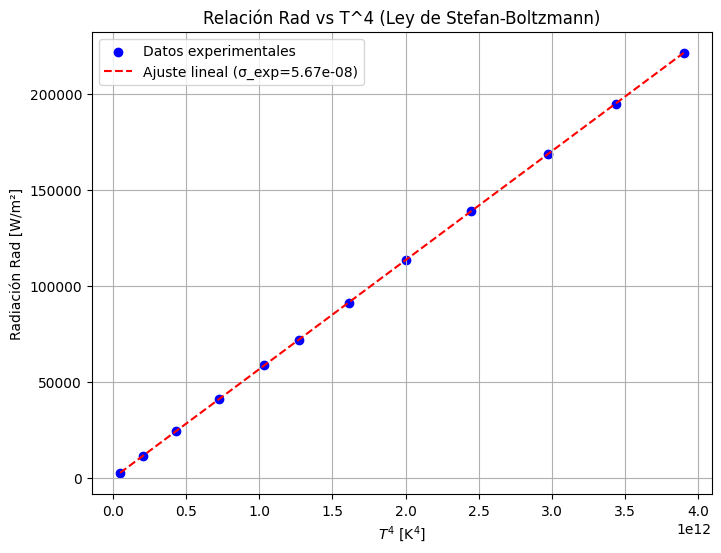

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
sigma = 5.670374419e-8  # Stefan-Boltzmann [W/m²K⁴]

# Datos experimentales
V = np.array([1,2,3,4,5,6,7,8,9,10,11,12])  # [V]
I = np.array([0.53,0.67,0.80,0.91,1.02,1.15,1.25,1.34,1.42,1.49,1.57,1.65])  # [A]
T = np.array([464.833151,673.275335,809.440559,921.887546,1008.579257,
              1061.682039,1126.586631,1190.077059,1251.244325,
              1312.960231,1361.713955,1405.637544])  # [K]

# Resistencia
R = V/I

# Cuarta potencia de T
T4 = T**4

# Radiación
Rad = sigma * T4

# Ajuste lineal
coef = np.polyfit(T4, Rad, 1)
fit = np.poly1d(coef)
Rad_fit = fit(T4)

# R² con NumPy
ss_res = np.sum((Rad - Rad_fit)**2)
ss_tot = np.sum((Rad - np.mean(Rad))**2)
r2 = 1 - (ss_res / ss_tot)

print("=== RESULTADOS DEL EXPERIMENTO ===")
print(f"Pendiente experimental: {coef[0]:.5e} W/m²K⁴")
print(f"Constante de Stefan-Boltzmann σ: {sigma:.5e} W/m²K⁴")
print(f"Diferencia relativa: {abs(coef[0]-sigma)/sigma*100:.3f} %")
print(f"Intercepto: {coef[1]:.2e} W/m² (≈ radiación ambiental)")
print(f"Coeficiente de correlación R²: {r2:.6f}")

# --- Graficar ---
plt.figure(figsize=(8,6))
plt.scatter(T4, Rad, color="blue", label="Datos experimentales")
plt.plot(T4, Rad_fit, 'r--', label=f"Ajuste lineal (σ_exp={coef[0]:.2e})")
plt.xlabel(r"$T^4$ [K$^4$]")
plt.ylabel("Radiación Rad [W/m²]")
plt.title("Relación Rad vs T^4 (Ley de Stefan-Boltzmann)")
plt.legend()
plt.grid(True)
plt.show()


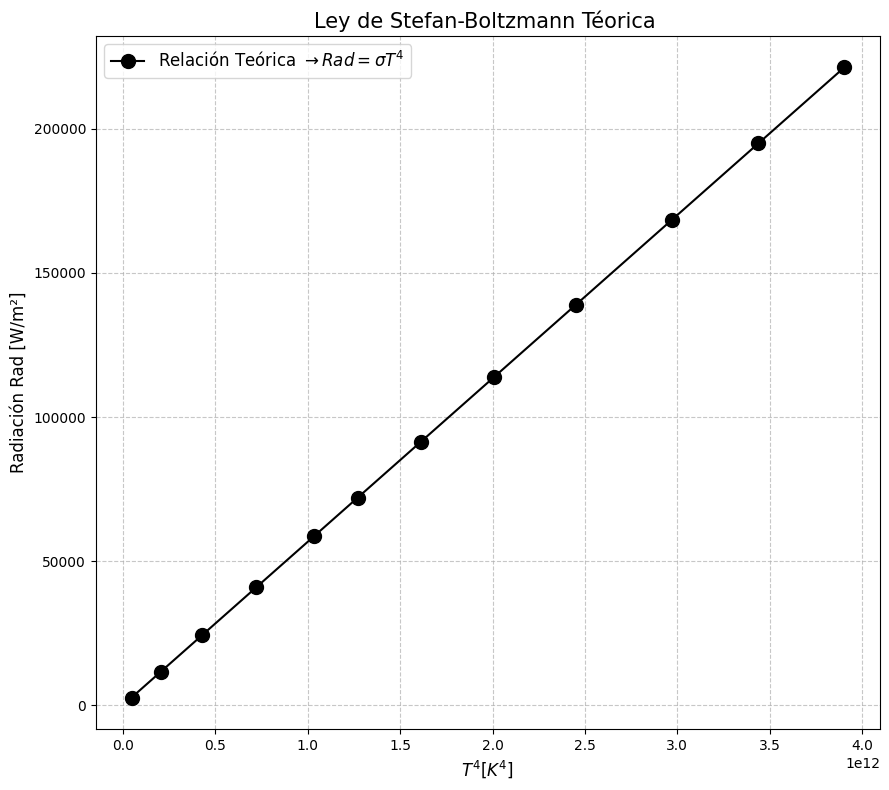

In [8]:
plt.figure(figsize=(9, 8))
plt.grid(True, linestyle='--', alpha=0.7)
plt.plot(T4,Rad,"-o",color="black",label=r"Relación Teórica $\rightarrow Rad=\sigma T^4$",markersize=10)
plt.legend(fontsize=12, loc='upper left')
plt.xlabel(r"$T^4[K^4]$",fontsize=12)
plt.ylabel("Radiación Rad [W/m²]",fontsize=12)
plt.title("Ley de Stefan-Boltzmann Téorica ",fontsize=15)
plt.tight_layout()

In [11]:
import numpy as np

sigma = 5.670374419e-8  # W/m^2 K^4
T_ref = 291.65  # K

# ---- Tus temperaturas del filamento (K) y lecturas del sensor (mV) ----
T = np.array([464.833151,673.275335,809.440559,921.887546,1008.579257,
              1061.682039,1126.586631,1190.077059,1251.244325,
              1312.960231,1361.713955,1405.637544])

mV_medidos = np.array([
    0,0.01,0.1,0.2,0.5,0.8,1.2,1.5,1.9,2.3,2.8,3.3
])


# Si tienes un solo valor de fondo:
mV_amb = np.full_like(T, 0.01)  # ejemplo

# 1) Variable "física" para el ajuste (absorbe emisividad/geom. en la pendiente)
X = sigma * (T**4 - T_ref**4)  # W/m^2

# 2) Señal útil del sensor (mV)
if mV_amb.size == 1:
    Y = mV_medidos - float(mV_amb)
else:
    Y = mV_medidos - mV_amb

# 3) Ajuste lineal Y = a*X + b
coef = np.polyfit(X, Y, 1)  # a [mV/(W/m^2)], b [mV]
a, b = coef
# 4) Factor de calibración y conversión
k = 1.0 / a  # (W/m^2)/mV

print(f"a (mV/(W/m^2)) = {a:.6e}")
print(f"b (mV) = {b:.6e}  # offset (fondo)")
print(f"Factor de calibración k = {k:.6e} (W/m^2)/mV")

# Función de conversión mV -> W/m^2 usando este montaje
def mV_a_Wm2(mV):
    return k * (mV - b)  # W/m^2

# Ejemplo de conversión:
# E_convertidos = mV_a_Wm2(mV_medidos)


a (mV/(W/m^2)) = 1.560255e-05
b (mV) = -2.673266e-01  # offset (fondo)
Factor de calibración k = 6.409208e+04 (W/m^2)/mV


In [12]:
print(mV_a_Wm2(mV_medidos))

[ 17133.5156099   17774.43643561  23542.72386698  29951.93212407
  49179.55689531  68407.18166655  94044.01469487 113271.63946612
 138908.47249444 164545.30552276 196591.34680817 228637.38809357]


In [13]:
RADm2=np.array([17256.95055221 , 17256.95055221 , 23660.35564298 , 30063.76073375,
  49273.97600605 , 68484.19127836 , 94097.81164144, 113308.02691374,
 138921.64727682 ,164535.2676399,  196552.29309374 ,228569.31854759])

In [19]:
# Ajuste lineal: y = m*t + b
coef = np.polyfit(T4, RADm2, 1)  # grado 1 → recta
m, b = coef
print(f"Ecuación ajustada: x(t) = {m:.3e} * t + {b:.3e}")
# Recta ajustada
t_fit = np.linspace(min(T4), max(T4), 100)
x_fit = 5.76e-8 * t_fit + b

Ecuación ajustada: x(t) = 5.670e-08 * t + 2.301e+02


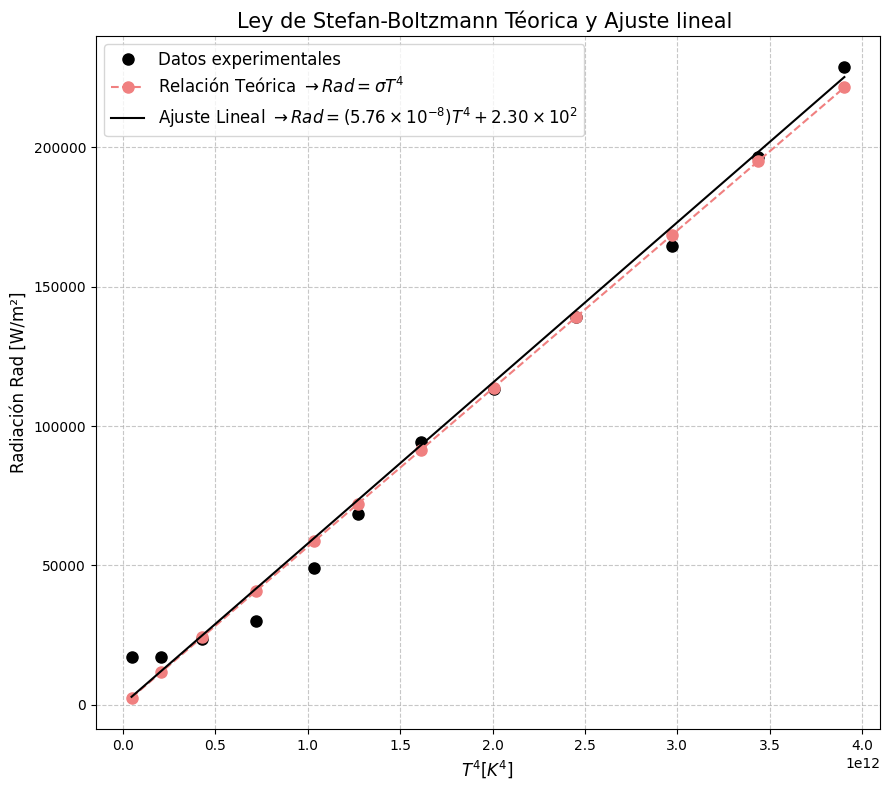

In [23]:
plt.figure(figsize=(9, 8))
plt.grid(True, linestyle='--', alpha=0.7)
plt.plot(T4,RADm2,"o",color="black",label=r"Datos experimentales",markersize=8)
plt.plot(T4,Rad,"--o",color="lightcoral",label=r"Relación Teórica $\rightarrow Rad=\sigma T^4$",markersize=8)
plt.plot(t_fit, x_fit, "-", color="black", label=r"Ajuste Lineal $\rightarrow Rad=(5.76\times 10^{-8}) T^4+2.30\times 10^{2}$",markersize=8)
plt.legend(fontsize=12, loc='upper left')
plt.xlabel(r"$T^4[K^4]$",fontsize=12)
plt.ylabel("Radiación Rad [W/m²]",fontsize=12)
plt.title("Ley de Stefan-Boltzmann Téorica y Ajuste lineal ",fontsize=15)
plt.tight_layout()

In [17]:
print(RADm2)
print(T4)

[ 17256.95055221  17256.95055221  23660.35564298  30063.76073375
  49273.97600605  68484.19127836  94097.81164144 113308.02691374
 138921.64727682 164535.2676399  196552.29309374 228569.31854759]
[4.66861837e+10 2.05480597e+11 4.29279202e+11 7.22290316e+11
 1.03476118e+12 1.27050940e+12 1.61086213e+12 2.00585869e+12
 2.45114206e+12 2.97170905e+12 3.43829830e+12 3.90385244e+12]


In [20]:
error=np.abs(5.67-5.76)*100/5.67
print(error)

1.5873015873015848
